<a href="https://colab.research.google.com/github/rswatsch/MAT421_RyanS/blob/main/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Root Finding Homework Assignment
**In this module we are developing an understanding for different root finding methods and will explore how they work and when to use them**



As we have learned in algebra many years ago the quadratic formula is a method of calculating roots in equations. Essentially all the methods I will demonstrate today use approximations to calculate roots.

# *Section 19.1*

Here we are demonstrating how fsolve works where we have an equation sin(x)-x and are establishing whether or not -4 is a root or close enough.

In [23]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

f = lambda x: np.sin(x) - x
r = optimize.fsolve(f, -4)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [-1.96910461e-08]
result= [0.]


The next example we are demonstrating that certain equation do not have roots and thus when checked will not display a 0 or close to it.

In [3]:
f = lambda x: 1/x

r, infodict, ier, mesg = optimize.fsolve(f, -4, full_output=True)
print("r =", r)

result = f(r)
print("result=", result)

print(mesg)

r = [-7.04094719e+83]
result= [-1.42026346e-84]
The number of calls to function has reached maxfev = 400.


# *Section 19.2*

This section discusses tolerance which is another way of representing error but more so acceptable error. Expected error where we have an acceptable range of values that we would count as accurate enough.

In [7]:
f = lambda x: x*x+.01

r, infodict, ier, mesg = optimize.fsolve(f, 15,xtol=.1, full_output=True)
print("r =", r)
result = f(r)
print("distance from zero=", result)

print(mesg)

r = [0.00174878]
distance from zero= [0.01000306]
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


Above demonstrates the previous example from 19.1, but it instead doesnt have a root. The next example is similar to the one before but instead I used a much smaller addition value.

In [8]:
f = lambda x: x*x+2e-10/10


r, infodict, ier, mesg = optimize.fsolve(f, 15, full_output=True)
print("r =", r)

result = f(r)
print("distance from zero=", result)

print(mesg)

r = [-5.82292053e-07]
distance from zero= [2.0339064e-11]
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


# *Section 19.3*

The next example will demonstrate how bisection works

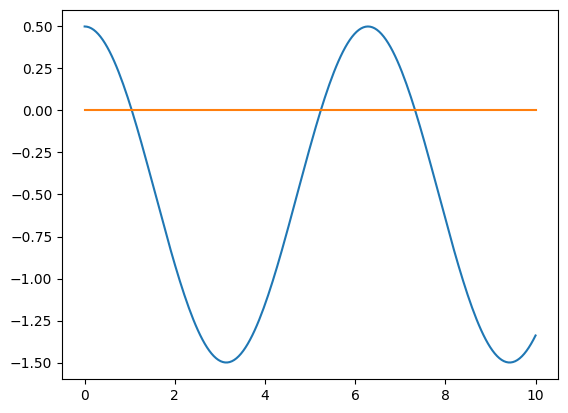

In [30]:
f = lambda x: np.cos(x) - .5

xx=np.linspace(0,10,200)

plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))


Above is a cos(x) graph which demonstrates oscillations that pass through our line every cycle. Using the intermediate value theorem we can find the roots.

In [31]:
import numpy as np

def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2

    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a.
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b.
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

The following will demonstrate a bisection of equation f which in this case is cos(x)-.5

In [47]:
f = lambda x: np.cos(x) - .5

r1 = my_bisection(f, 0, 4, 0.1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 4, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.0
r01 = 1.046875
f(r1) = 0.040302305868139765
f(r01) = 0.000279311515612668


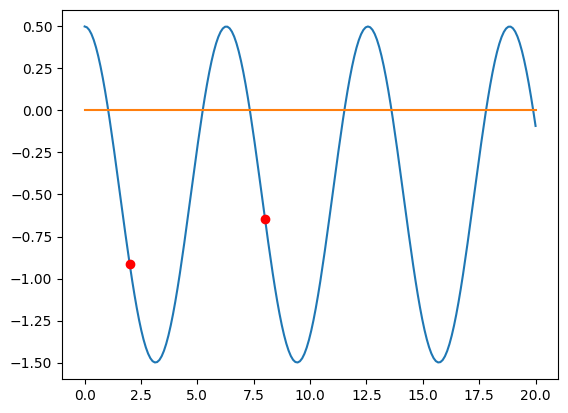

r1 = 1.046875
f(r1) = 0.000279311515612668


In [44]:
f = lambda x: np.cos(x) - .5

xx=np.linspace(0,20,200)
plt.plot(xx,f(xx))
plt.plot(xx,[0]*len(xx))
plt.plot([2,8],[f(2),f(8)],'ro')

plt.show()

r1 = my_bisection(f, 0, 4, 0.01)
print("r1 =", r1)
print("f(r1) =", f(r1))

The next part will demonstrate what occurs when you use a improper variable set

In [46]:
my_bisection(f, 3, 4, 0.01)

Exception: The scalars a and b do not bound a root

# Section 19.4

This section will utilize the newton raphson method

In [55]:
import numpy as np

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 3.25 - (f(1.4))/(f_prime((3.25)))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 3.2561538461538464
sqrt(2) = 1.4142135623730951


Using the previous equation with a tolerance of zero we are estimating the output utilizing the newton-raphson method.

In [56]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

Now we are using the newton-raphson method to estimate root's such as the example below.

In [58]:
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(5))

estimate = 1.4142135623746899
sqrt(2) = 2.23606797749979


Now demonstrating a single step approximation

In [60]:
x0 = 0.1
x1 = x0-(x0**3+3*x0**2-2*x0-5)/(3*x0**2+6*x0-2)
print("x1 =", x1)

x1 = -3.672992700729927


Another example but this time we are starting with x(0) = 0

In [66]:
x0 = 0
x1 = x0-(x0**3+100*x0**2-x0+100)/(3*x0**2+x0-2)
print("x1 =", x1)

x1 = 50.0


# Section 19.5

In [67]:
from scipy.optimize import fsolve

Now to demonstrate finding roots of certain function using the built in code python has.

In [71]:
f = lambda x: 4*x**3-200*x**2-x+50

fsolve(f, [2, 80])

array([ 0.5, 50. ])